# Sentiment analysis

## Data exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import os
import sklearn
#from tpot import TPOTClassifier

# to make this notebook's output stable across runs
np.random.seed(42)


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl

import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [3]:
# Import data
filepathGalaxy="C:/Users/Constantinos/Desktop/Ubiqum/BIG DATA/galaxy_smallmatrix_labeled_8d.csv"
filepathIphone="C:/Users/Constantinos/Desktop/Ubiqum/BIG DATA/iphone_smallmatrix_labeled_8d.csv"
Galaxy=pd.read_csv(filepathGalaxy)
display(Galaxy)
Iphone=pd.read_csv(filepathIphone)


,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxysentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,41,0,0,0,0,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
6,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
display(Iphone)

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,41,0,0,0,0,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
6,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Galaxy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12973 entries, 0 to 12972
Data columns (total 59 columns):
iphone             12973 non-null int64
samsunggalaxy      12973 non-null int64
sonyxperia         12973 non-null int64
nokialumina        12973 non-null int64
htcphone           12973 non-null int64
ios                12973 non-null int64
googleandroid      12973 non-null int64
iphonecampos       12973 non-null int64
samsungcampos      12973 non-null int64
sonycampos         12973 non-null int64
nokiacampos        12973 non-null int64
htccampos          12973 non-null int64
iphonecamneg       12973 non-null int64
samsungcamneg      12973 non-null int64
sonycamneg         12973 non-null int64
nokiacamneg        12973 non-null int64
htccamneg          12973 non-null int64
iphonecamunc       12973 non-null int64
samsungcamunc      12973 non-null int64
sonycamunc         12973 non-null int64
nokiacamunc        12973 non-null int64
htccamunc          12973 non-null int64
iphonedispo

In [5]:
Iphone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12973 entries, 0 to 12972
Data columns (total 59 columns):
iphone             12973 non-null int64
samsunggalaxy      12973 non-null int64
sonyxperia         12973 non-null int64
nokialumina        12973 non-null int64
htcphone           12973 non-null int64
ios                12973 non-null int64
googleandroid      12973 non-null int64
iphonecampos       12973 non-null int64
samsungcampos      12973 non-null int64
sonycampos         12973 non-null int64
nokiacampos        12973 non-null int64
htccampos          12973 non-null int64
iphonecamneg       12973 non-null int64
samsungcamneg      12973 non-null int64
sonycamneg         12973 non-null int64
nokiacamneg        12973 non-null int64
htccamneg          12973 non-null int64
iphonecamunc       12973 non-null int64
samsungcamunc      12973 non-null int64
sonycamunc         12973 non-null int64
nokiacamunc        12973 non-null int64
htccamunc          12973 non-null int64
iphonedispo

In [6]:
Galaxy.describe()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxysentiment
count,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,...,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000
mean,2.148077,0.071148,0.024050,0.002312,0.137131,0.152316,0.039621,0.289601,0.053727,0.009944,...,0.002312,0.005550,0.064133,0.059200,0.038542,0.057581,0.058198,0.033069,0.016110,3.824327
std,5.664226,0.280869,0.171266,0.051144,4.223547,0.839081,0.255020,2.188978,0.711322,0.163251,...,0.086887,0.183249,0.829639,0.550736,0.426599,0.565341,0.586035,0.313733,0.285808,1.781302
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,46.000000,8.000000,8.000000,2.000000,479.000000,6.000000,6.000000,156.000000,65.000000,8.000000,...,5.000000,13.000000,59.000000,26.000000,24.000000,20.000000,25.000000,10.000000,24.000000,5.000000


In [6]:
Iphone.describe()

,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
count,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,...,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000,12973.000000
mean,2.148077,0.071148,0.024050,0.002312,0.137131,0.152316,0.039621,0.289601,0.053727,0.009944,...,0.002312,0.005550,0.064133,0.059200,0.038542,0.057581,0.058198,0.033069,0.016110,3.724505
std,5.664226,0.280869,0.171266,0.051144,4.223547,0.839081,0.255020,2.188978,0.711322,0.163251,...,0.086887,0.183249,0.829639,0.550736,0.426599,0.565341,0.586035,0.313733,0.285808,1.851348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,46.000000,8.000000,8.000000,2.000000,479.000000,6.000000,6.000000,156.000000,65.000000,8.000000,...,5.000000,13.000000,59.000000,26.000000,24.000000,20.000000,25.000000,10.000000,24.000000,5.000000


As we can see the dataset matrix is sparse. __Most of the words do not appear more than 10 times in the reviews.__

In [7]:
print(Iphone.columns)
print(Galaxy.columns)

Index(['iphone', 'samsunggalaxy', 'sonyxperia', 'nokialumina', 'htcphone',
       'ios', 'googleandroid', 'iphonecampos', 'samsungcampos', 'sonycampos',
       'nokiacampos', 'htccampos', 'iphonecamneg', 'samsungcamneg',
       'sonycamneg', 'nokiacamneg', 'htccamneg', 'iphonecamunc',
       'samsungcamunc', 'sonycamunc', 'nokiacamunc', 'htccamunc',
       'iphonedispos', 'samsungdispos', 'sonydispos', 'nokiadispos',
       'htcdispos', 'iphonedisneg', 'samsungdisneg', 'sonydisneg',
       'nokiadisneg', 'htcdisneg', 'iphonedisunc', 'samsungdisunc',
       'sonydisunc', 'nokiadisunc', 'htcdisunc', 'iphoneperpos',
       'samsungperpos', 'sonyperpos', 'nokiaperpos', 'htcperpos',
       'iphoneperneg', 'samsungperneg', 'sonyperneg', 'nokiaperneg',
       'htcperneg', 'iphoneperunc', 'samsungperunc', 'sonyperunc',
       'nokiaperunc', 'htcperunc', 'iosperpos', 'googleperpos', 'iosperneg',
       'googleperneg', 'iosperunc', 'googleperunc', 'iphonesentiment'],
      dtype='object')
Index(

# Histograms

Text(0, 0.5, 'count')

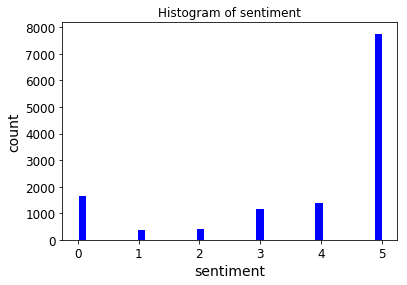

In [10]:
# matplotlib histogram
plt.hist(Galaxy['galaxysentiment'], color = 'blue', edgecolor = 'white',
         bins = int(180/5))
# Add labels
plt.title('Histogram of sentiment')
plt.xlabel('sentiment')
plt.ylabel('count')

Text(0, 0.5, 'count')

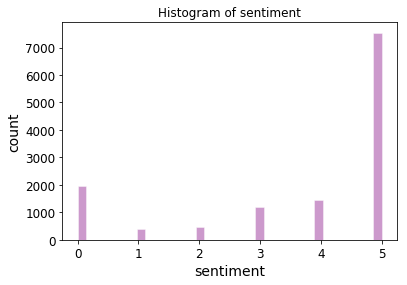

In [7]:
# seaborn histogram
sns.distplot(Iphone['iphonesentiment'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple',
             hist_kws={'edgecolor':'white'})
# Add labels
plt.title('Histogram of sentiment')
plt.xlabel('sentiment')
plt.ylabel('count')

The depended variable __classes are unbalanced.__ Most classification algorithms will only perform optimally when the number of samples of each class is roughly the same. Highly skewed datasets, where the minority is heavily outnumbered by one or more classes, have proven to be a challenge while at the same time becoming more and more common.

__One way of addressing this issue is by re-sampling the dataset as to offset this imbalance with the hope of arriving at a more robust and fair decision boundary than you would otherwise.__

__Re-sampling techniques are divided in two categories:__  
__1)__ __Over-Under Sampling__ 
- Under-sampling the majority class(es)  
- Over-sampling the minority class  
- Combining over- and under-sampling  

__2)__ __Create ensemble balanced sets__  

## 1- Resampling (Oversampling and Undersampling):

__Undersampling__ is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class. __Oversampling__ is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class. There are a number of methods used to oversample a dataset for a typical classification problem. The most common technique is called __SMOTE (Synthetic Minority Over-sampling Technique).__ In simple terms, it looks at the feature space for the minority class data points and considers its k nearest neighbours.

## 2- Ensembling Methods (Ensemble of Sampler):


In Machine Learning, ensemble methods use multiple learning algorithms and techniques to obtain better performance than what could be obtained from any of the constituent learning algorithms alone. In the scikit-learn library, there is an ensemble classifier namedBaggingClassifier. However, this classifier does not allow to balance each subset of data. Therefore, when training on imbalanced data set, this classifier will favour the majority classes and create a biased model.In order to fix this, we can use __BalancedBaggingClassifier__ from imblearn library. __It allows the resampling of each subset of the dataset before training each estimator of the ensemble.__ Therefore, BalancedBaggingClassifier takes the same parameters as the scikit-learn BaggingClassifierin addition to two other parameters, sampling_strategy and replacement which control the behaviour of the random sampler.

# Corelation

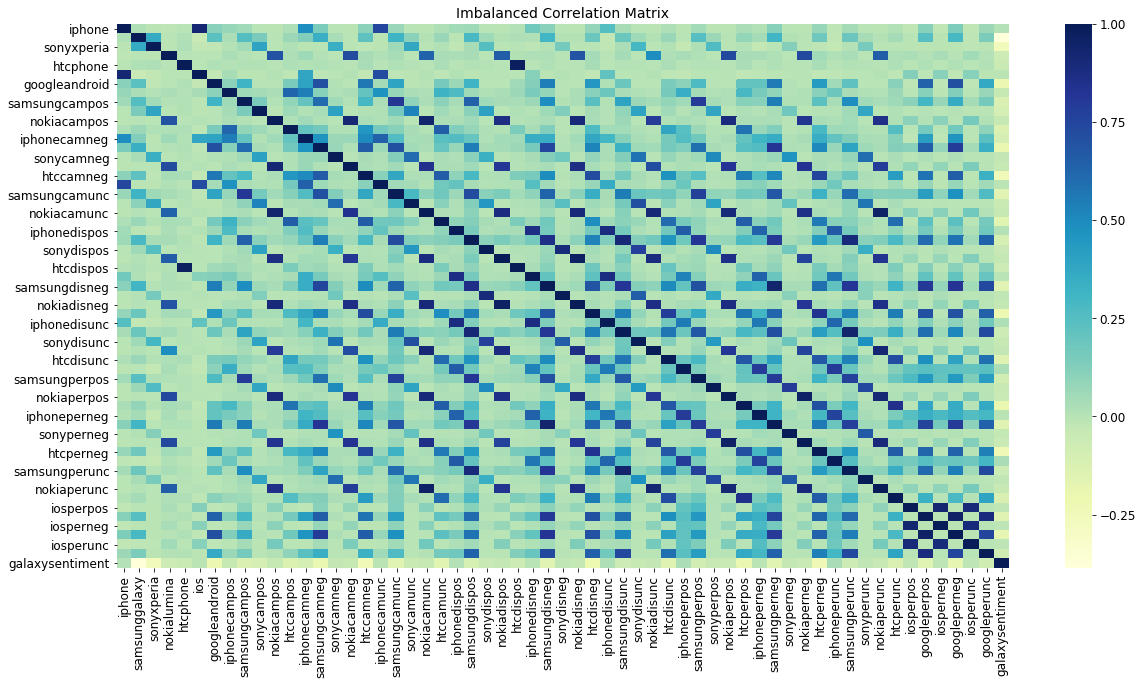

In [15]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))

# Imbalanced DataFrame Correlation
corr = Galaxy.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

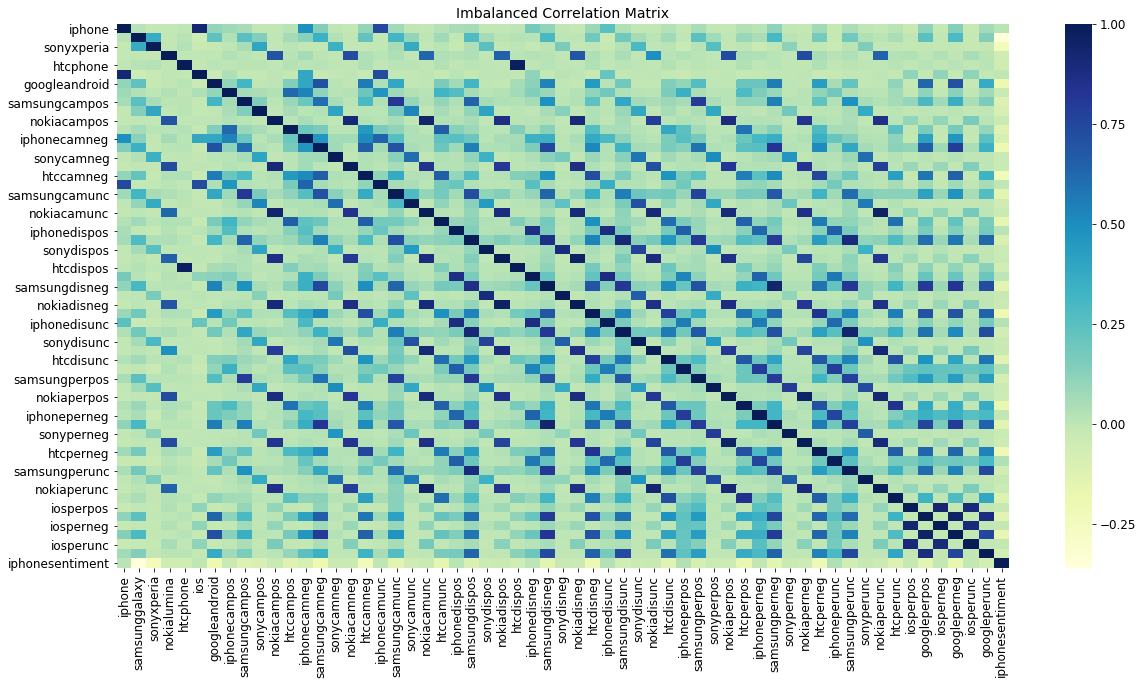

In [16]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))

# Imbalanced DataFrame Correlation
corr = Iphone.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

## Prepare datasets

In [4]:
# Segregate features and labels into separate variables and convert the DataFrame to a NumPy array

y_Gal = Galaxy['galaxysentiment'].values
X_Gal = Galaxy.drop('galaxysentiment',axis=1).values 


# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y_Gal.shape))
print("Dimensions of X before reshaping: {}".format(X_Gal.shape))

# Reshape X and y
y_Gal = y_Gal.reshape(-1, 1)


# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y_Gal.shape))
print("Dimensions of X after reshaping: {}".format(X_Gal.shape))

y_Ip = Iphone['iphonesentiment'].values
X_Ip = Iphone.drop('iphonesentiment',axis=1).values

# Reshape X and y
y_Ip = y_Ip.reshape(-1, 1)


Dimensions of y before reshaping: (12973,)
Dimensions of X before reshaping: (12973, 58)
Dimensions of y after reshaping: (12973, 1)
Dimensions of X after reshaping: (12973, 58)


In [5]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Create a stratified train  and test 

X_trainG, X_testG, y_trainG, y_testG = train_test_split(X_Gal,
                                                    y_Gal,
                                                    stratify=y_Gal,
                                                    test_size=0.3,
                                                    random_state=42)

X_trainI, X_testI, y_trainI, y_testI = train_test_split(X_Ip,
                                                    y_Ip,
                                                    stratify=y_Ip,
                                                    test_size=0.3,
                                                    random_state=42)



# Feature Selection

__Curse of Dimesionality:__ while more data tends to improve the robustness of a model when the added data comes in the form of new features this is not always the case.If we keep adding features without increasing the examples our datasets density increases exponentially and this sparsity will cause the model to overfit easily. 
We can remedy this by selecting a subset of original features  __Feature Selection__ or by __Feature extraction__ using PCA to project features in a space with fewer dimensions.  
  
__Advantages of dimension reduction before modeling your data are:__  
  
__Reduces Overfitting:__ less opportunity to make decisions based on noise.  
__Improves Accuracy:__ Less misleading data .  
__Reduces Training Time:__ Less data, algorithms train faster.  

__Feature Selection Methods:__  
  
__1)Filter Methods__: features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable.  

__2)Wrapper Methods__: __Recursive Feature elimination__ is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

__3)Embedded Methods__:refer to algorithms that perform "feature selection" by  the form of penalization(__Lasso regression__ performs __L1 regularization__ which adds penalty equivalent to absolute value of the magnitude of coefficients.__Ridge regression__ performs __L2 regularization__ which adds penalty equivalent to square of the magnitude of coefficients.


## Feature selection using Scikit Learn


### 1. Univariate Selection based on Chi squared Statistical tests

__SelectKBest__ class that can be used with a suite of different statistical tests to select a specific number of features.

In [38]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X = Galaxy.iloc[:,0:58]  #independent columns
y = Galaxy.iloc[:,-1] 
#apply SelectKBest class to extract top 10 best features based on chi2
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores

,Specs,Score
0,iphone,28329.784605
1,samsunggalaxy,2814.821562
2,sonyxperia,1363.834695
3,nokialumina,77.116552
4,htcphone,7088.170837
5,ios,8644.241528
6,googleandroid,1224.005877
7,iphonecampos,2250.044378
8,samsungcampos,2563.338005
9,sonycampos,421.912493


In [39]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features


           Specs         Score
0         iphone  28329.784605
17  iphonecamunc  10883.576075
32  iphonedisunc   8808.523543
5            ios   8644.241528
26     htcdispos   8555.754039
27  iphonedisneg   7111.885621
4       htcphone   7088.170837
41     htcperpos   6808.397768
11     htccampos   6604.927397
46     htcperneg   6110.308144


### 2.VarianceThreshold 

__VarianceThreshold__ is a simple baseline approach to feature selection. It removes all features whose variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

In [42]:
from sklearn.feature_selection import VarianceThreshold
Xi = Iphone.iloc[:,0:58]
threshold = VarianceThreshold(threshold=0.2)
NewXi=threshold.fit_transform(Xi)
NewXi.shape

(12973, 32)

### 3. Selection based on mutual information (MI)

__Mutual information (MI)__ between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distance. Mutual information can capture any kind of dependency between variables and it rates x_2 as the most discriminative feature.

In [47]:
from sklearn.feature_selection import mutual_info_classif
Xg = Galaxy.iloc[:,0:58]  #independent columns
yg = Galaxy.iloc[:,-1]
mi = mutual_info_classif(Xg, yg, n_neighbors=5, copy=True, random_state=None)

scores = pd.DataFrame(mi)
columns = pd.DataFrame(Xg.columns)

#concat two dataframes for better visualization 
featScores = pd.concat([columns,scores],axis=1)
featScores.columns = ['Specs','Score']  #naming the dataframe columns
featScores.nlargest(10,'Score') 

,Specs,Score
0,iphone,0.232763
4,htcphone,0.104929
27,iphonedisneg,0.079710
1,samsunggalaxy,0.075588
32,iphonedisunc,0.074148
17,iphonecamunc,0.067084
12,iphonecamneg,0.066047
5,ios,0.056242
22,iphonedispos,0.056141
26,htcdispos,0.052560


### 4.  Recursive Feature Elimination

__RFE__ works by recursively removes attributes and building a model on those attributes that remain.

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=15)
fit = rfe.fit(X_Ip, y_Ip)

print("Features:{}".format(fit.n_features_))
print("Selected Features:{}".format(fit.support_))
print("Feature Ranking:{}".format(fit.ranking_))


Features:15
Selected Features:[False  True  True  True  True  True  True False False False False False
 False False  True False  True False False  True False  True False False
 False False False False False False False False False False False False
 False False  True  True False False False False  True False False False
 False  True False False False  True False False False False]
Feature Ranking:[ 5  1  1  1  1  1  1 44 15 23 17  6 22  3  1 29  1 42  2  1 20  1 43  9
 24 18 16 39 21 25 35 32 38  8 14 31 12 36  1  1 19 26 37  4  1 30 27 34
  7  1 28 13 40  1 41 11 33 10]


### 5. Feature Importance

__Feature importance__ is an inbuilt class that comes with Tree Based Classifiers, the higher the score more important or relevant is the feature towards your output variable.

C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


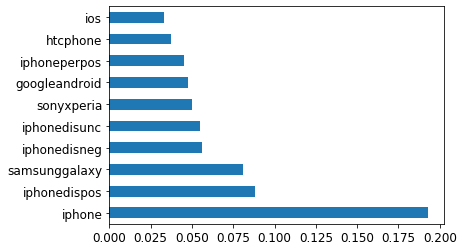

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 6. Principal Component Analysis

In [108]:
from sklearn.preprocessing import StandardScaler
features = ['iphone', 'samsunggalaxy', 'sonyxperia', 'nokialumina', 'htcphone',
       'ios', 'googleandroid', 'iphonecampos', 'samsungcampos', 'sonycampos',
       'nokiacampos', 'htccampos', 'iphonecamneg', 'samsungcamneg',
       'sonycamneg', 'nokiacamneg', 'htccamneg', 'iphonecamunc',
       'samsungcamunc', 'sonycamunc', 'nokiacamunc', 'htccamunc',
       'iphonedispos', 'samsungdispos', 'sonydispos', 'nokiadispos',
       'htcdispos', 'iphonedisneg', 'samsungdisneg', 'sonydisneg',
       'nokiadisneg', 'htcdisneg', 'iphonedisunc', 'samsungdisunc',
       'sonydisunc', 'nokiadisunc', 'htcdisunc', 'iphoneperpos',
       'samsungperpos', 'sonyperpos', 'nokiaperpos', 'htcperpos',
       'iphoneperneg', 'samsungperneg', 'sonyperneg', 'nokiaperneg',
       'htcperneg', 'iphoneperunc', 'samsungperunc', 'sonyperunc',
       'nokiaperunc', 'htcperunc', 'iosperpos', 'googleperpos', 'iosperneg',
       'googleperneg', 'iosperunc', 'googleperunc']
# Separating out the features
xs = Galaxy.loc[:, features].values
# Separating out the target
ys = Galaxy.loc[:,['galaxysentiment']].values
# Standardizing the features
xs = StandardScaler().fit_transform(xs)

In [112]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(xs)
print(pca.explained_variance_)
print(pca.components_)
print('')
X_pca = pca.transform(xs)
print("original shape:   ", xs.shape)
print("transformed shape:", X_pca.shape)


[11.89945302  8.44286842  4.83194744  4.43642461  3.65368988  2.96870509
  2.68384879  2.1212431   1.93194235  1.75589687  1.72592404  1.3302623
  1.18395508  0.98342098  0.68824612]
[[ 4.39113974e-02  8.60337060e-02  1.09680870e-02  4.39818404e-02
   1.27994055e-02  1.06516912e-02  1.59719749e-01  6.95557205e-02
   1.51765952e-01  2.90282248e-02  5.45666941e-02  9.06501230e-02
   1.40258587e-01  2.09668456e-01  3.74241170e-02  5.17454935e-02
   1.91069798e-01  5.30166266e-02  1.92572870e-01  3.98689410e-02
   5.96208741e-02  1.22809009e-01  9.32654961e-02  2.33617009e-01
   2.84322006e-02  6.18245783e-02  4.92452132e-02  1.02716377e-01
   2.59956725e-01  1.43856552e-02  5.96321566e-02  2.30227296e-01
   8.23084360e-02  2.17167224e-01  4.06025378e-02  6.11403064e-02
   1.86350864e-01  1.11055916e-01  1.98739923e-01  2.77969573e-02
   5.62937520e-02  1.60391479e-01  1.34467721e-01  2.51671760e-01
   1.79037704e-02  5.34964055e-02  2.14173138e-01  1.08122051e-01
   2.23397145e-01  3.5806

   1.02845873e-01 -1.31414841e-02]]

original shape:    (12973, 58)
transformed shape: (12973, 15)


### 7. Lasso Feature Selection

In [101]:
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(X_Ip, y_Ip)

# Compute and print the coefficients
lasso_coef = lasso.coef_
scores = pd.DataFrame(lasso_coef)
columns = pd.DataFrame(Xi.columns)

#concat two dataframes for better visualization 
featScores = pd.concat([columns,scores],axis=1)
featScores.columns = ['Specs','Score']  #naming the dataframe columns
featScores.sort_values('Score', ascending=True).head(10)


,Specs,Score
1,samsunggalaxy,-0.933649
46,htcperneg,-0.129751
16,htccamneg,-0.092011
41,htcperpos,-0.074796
11,htccampos,-0.026600
4,htcphone,-0.013349
31,htcdisneg,-0.001400
40,nokiaperpos,-0.000000
39,sonyperpos,-0.000000
28,samsungdisneg,-0.000000


### 8. Ridge Regression feature selection

In [105]:
print(lasso_coef)
print(lasso_coef.shape)
print(ridge_coef)
print(ridge_coef.shape)
columns.shape


[ 0.00616364 -0.93364948 -0.         -0.         -0.01334852 -0.
 -0.          0.         -0.         -0.         -0.         -0.02659996
 -0.         -0.         -0.         -0.         -0.0920107  -0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.         -0.00139999  0.          0.         -0.         -0.
 -0.          0.03300684 -0.         -0.         -0.         -0.07479593
  0.         -0.         -0.         -0.         -0.12975063  0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.        ]
(58,)
[[ 0.15049183]
 [-1.81166851]
 [-1.42531283]
 [-2.16602232]
 [-0.58982409]
 [-0.91098427]
 [-0.87296351]
 [ 0.0419962 ]
 [-0.17260143]
 [-0.32001965]
 [-0.67161726]
 [ 0.00538944]
 [-0.01127508]
 [-0.41270153]
 [ 0.56678286]
 [ 0.1993805 ]
 [-0.06983697]
 [-0.06521997]
 [ 0.15245219]
 [ 0.44872305]
 [ 1.32207923]
 [-0.07881082]
 [-0.03351328

(58, 1)

In [106]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=False)
ridge.fit(X_Ip, y_Ip)
ridge_coef = ridge.coef_
ridge_coef =ridge_coef.reshape(58, 1)
print(ridge_coef)
scores = pd.DataFrame(ridge_coef)

columns = pd.DataFrame(Xi.columns)

#concat two dataframes for better visualization 
featScore = pd.concat([columns,scores],axis=1)

featScore.columns = ['Specs','Score']  #naming the dataframe columns
featScore.sort_values('Score', ascending=True).head(10)

[[ 0.15049183]
 [-1.81166851]
 [-1.42531283]
 [-2.16602232]
 [-0.58982409]
 [-0.91098427]
 [-0.87296351]
 [ 0.0419962 ]
 [-0.17260143]
 [-0.32001965]
 [-0.67161726]
 [ 0.00538944]
 [-0.01127508]
 [-0.41270153]
 [ 0.56678286]
 [ 0.1993805 ]
 [-0.06983697]
 [-0.06521997]
 [ 0.15245219]
 [ 0.44872305]
 [ 1.32207923]
 [-0.07881082]
 [-0.03351328]
 [ 0.26730337]
 [-0.30431766]
 [ 0.11814587]
 [ 0.57849437]
 [ 0.01886989]
 [ 0.2011513 ]
 [-0.04446084]
 [ 0.17403083]
 [-0.20603485]
 [-0.02366558]
 [-0.55867151]
 [ 0.95016076]
 [-0.12022462]
 [-0.73892118]
 [ 0.05482127]
 [ 0.18643595]
 [ 1.10877652]
 [ 0.05242803]
 [-0.58757815]
 [ 0.02266325]
 [-0.04113443]
 [-0.6315121 ]
 [-0.0135938 ]
 [ 0.01124994]
 [ 0.03861572]
 [ 0.03446807]
 [-0.50673228]
 [-0.60921199]
 [ 0.63576877]
 [-0.1517575 ]
 [ 0.37639565]
 [ 0.01827221]
 [-0.03576434]
 [ 0.28649342]
 [-0.07668347]]


,Specs,Score
3,nokialumina,-2.166022
1,samsunggalaxy,-1.811669
2,sonyxperia,-1.425313
5,ios,-0.910984
6,googleandroid,-0.872964
36,htcdisunc,-0.738921
10,nokiacampos,-0.671617
44,sonyperneg,-0.631512
50,nokiaperunc,-0.609212
4,htcphone,-0.589824


### Concatenating multiple feature extraction methods

Finaly we can combine features obtained by PCA, univariate selection and other selection methods.

In [115]:
from sklearn.pipeline import Pipeline, FeatureUnion
#transformed features
pca = PCA(n_components=5)

# original features 
selection = SelectKBest(k=5)

# Build estimator from PCA and Univariate selection:

combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(X, y).transform(X)
print("Combined space has", X_features.shape[1], "features")
print(X_features)

Combined space has 10 features
[[-0.83794593  1.33960573 -0.93984826 ...  0.          0.
   0.        ]
 [-0.79971483  1.29646519 -0.66073798 ...  0.          0.
   0.        ]
 [-0.83794593  1.33960573 -0.93984826 ...  0.          0.
   0.        ]
 ...
 [-0.83794593  1.33960573 -0.93984826 ...  0.          0.
   0.        ]
 [-0.32491707  0.14908149 -0.5612937  ...  0.          0.
   1.        ]
 [-0.83794593  1.33960573 -0.93984826 ...  0.          0.
   0.        ]]


## Feature selection using TPOT

# Train models with Scikit Learn

We will use all the features for both datasets and will train 6 clasiffication models to find the best performer to be used for the sentiment prediction. We will use the __imbalanced learn library__ to treat the class imbalance and explore the different methods that can be used to mediate this problem in a dataset.

# 1) Logistic Regresion

In [25]:
# Class percentage
print(Galaxy.groupby('galaxysentiment').size()/Galaxy['galaxysentiment'].count())
print(Iphone.groupby('iphonesentiment').size()/Iphone['iphonesentiment'].count())

galaxysentiment
0    0.131273
1    0.030062
2    0.034996
3    0.091575
4    0.110923
5    0.601172
dtype: float64
iphonesentiment
0    0.151237
1    0.030062
2    0.034996
3    0.091575
4    0.110923
5    0.581207
dtype: float64


First we will correct class imbalnce using logistic regression argument __class weight__  which puts weights on errors proportional to the class imbalance.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

lr = LogisticRegression(class_weight='balanced')

# Fit..
lr.fit(X_trainG, y_trainG)

# Predict..
lr_predG = lr.predict(X_testG)

# Evaluate the model
print(classification_report(y_testG, lr_predG))
print('')
print(confusion_matrix(lr_predG, y_testG))
#plot_confusion_matrix(confusion_matrix(y_testG, lr_predG))

C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


              precision    recall  f1-score   support

           0       0.80      0.78      0.79       511
           1       0.00      0.00      0.00       117
           2       0.33      0.02      0.04       136
           3       0.77      0.30      0.43       356
           4       0.62      0.31      0.42       432
           5       0.73      0.94      0.82      2340

   micro avg       0.73      0.73      0.73      3892
   macro avg       0.54      0.39      0.42      3892
weighted avg       0.69      0.73      0.69      3892

[[ 397    3    8   18   19   52]
 [   0    0    0    0    1    3]
 [   0    0    3    0    4    2]
 [   3    0   14  106    6    9]
 [   5    4    3    5  136   66]
 [ 106  110  108  227  266 2208]]


In [39]:
# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs",class_weight='balanced')
# Fit..
lr_mn.fit(X_trainI, y_trainI)

# Predict..
lr_mn_predI = lr_mn.predict(X_testI)

# Evaluate the model
print(classification_report(y_testI, lr_mn_predI))
print('')
print(confusion_matrix(lr_mn_predI, y_testI))
#plot_confusion_matrix(confusion_matrix(y_testG, lr_predG))

C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.77      0.68      0.72       589
           1       0.04      0.83      0.07       117
           2       0.11      0.12      0.12       136
           3       0.64      0.38      0.48       356
           4       0.59      0.38      0.46       432
           5       0.70      0.05      0.10      2262

   micro avg       0.24      0.24      0.24      3892
   macro avg       0.47      0.41      0.32      3892
weighted avg       0.65      0.24      0.27      3892


[[ 399    3    8   18   13   77]
 [ 153   97   92  136  220 1861]
 [   8    4   17   47   10   66]
 [   7    5    3  136   11   52]
 [  10    4   11    4  163   86]
 [  12    4    5   15   15  120]]


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

# Fit..
pipe.fit(X_trainG, y_trainG)

# Predict..
y_pred = pipe.predict(X_testG)

# Evaluate the model
print(classification_report(y_testG, y_pred))

## 2) SVM 

We will use __RandomOverSampler__ ,and the __SMOTE (Synthetic Minority Oversampling Technique)__ and __ADASYN (Adaptive Synthetic)__ oversampling variants to treat class imbalance 

In [26]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler
from collections import Counter

def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')
    
    
 

C:\Users\Constantinos\Anaconda3\envs\MachineLearning Andrew Ng\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Constantinos\Anaconda3\envs\MachineLearning Andrew Ng\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NameError: name 'plot_decision_function' is not defined

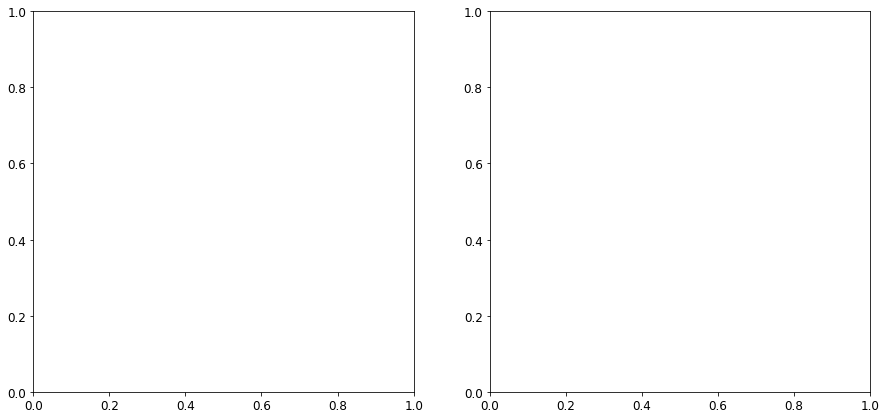

In [6]:
from sklearn.svm import LinearSVC

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
# fit
clf = LinearSVC().fit(X_trainG, y_trainG)
# make plot
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
# make pipe
pipe = make_pipeline(RandomOverSampler(random_state=0), LinearSVC())
pipe.fit(X_trainG, y_trainG)
# make plot
plot_decision_function(X, y, pipe, ax2)
ax2.set_title('Decision function for RandomOverSampler')
fig.tight_layout()


### Linear SVM

In [41]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_trainG, y_trainG)

SVMG = LinearSVC(maxi)
SVMG.fit(X_ros, y_ros)
y_pred = SVMG.predict(X_testG)

# Evaluate the model
print(classification_report(y_testG, y_pred))
print('')
print(confusion_matrix(y_pred, y_testG))

C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.75      0.76      0.76       511
           1       0.04      0.76      0.07       117
           2       0.09      0.17      0.12       136
           3       0.59      0.31      0.41       356
           4       0.48      0.35      0.41       432
           5       0.78      0.09      0.17      2340

   micro avg       0.25      0.25      0.25      3892
   macro avg       0.46      0.41      0.32      3892
weighted avg       0.68      0.25      0.29      3892


[[ 390    4   10   19   17   82]
 [  76   89   84  165  200 1713]
 [   9    9   23   46   20  155]
 [   9    0    7  110   15   44]
 [  13    7    7   10  153  128]
 [  14    8    5    6   27  218]]


### Non Linear SVM

In [55]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
y_trainI=y_trainI.ravel()
y_testI=y_testI.ravel()

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_trainI, y_trainI)

SVMI = SVC(max_iter=4000)
SVMI.fit(X_sm, y_sm)
SVMpredI = SVMI.predict(X_testI)

# Evaluate the model
print(classification_report(y_testI, SVMpredI))
print('')
print(confusion_matrix(SVMpredI, y_testI))

C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.83      0.69      0.75       589
           1       0.06      0.02      0.03       117
           2       1.00      0.01      0.03       136
           3       0.91      0.44      0.59       356
           4       0.89      0.32      0.47       432
           5       0.72      0.97      0.82      2262

   micro avg       0.74      0.74      0.74      3892
   macro avg       0.73      0.41      0.45      3892
weighted avg       0.76      0.74      0.70      3892


[[ 404    2   18    8   15   38]
 [   1    2    4    3    5   19]
 [   0    0    2    0    0    0]
 [   2    1    1  155    2   10]
 [   2    1    1    2  137   11]
 [ 180  111  110  188  273 2184]]


### Non Linear SVM for Galaxy using ADASYN resampling

In [56]:
from imblearn.over_sampling import ADASYN 
from sklearn.model_selection import GridSearchCV

y_trainG=y_trainG.ravel()
y_testG=y_testG.ravel()

X_ad, y_ad = ADASYN().fit_resample(X_trainG, y_trainG)

svm = SVC(max_iter=4000)

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_ad, y_ad)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_testG, y_testG))



C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_i

KeyboardInterrupt: 

### 3) KNN 


 We will use __undersampling__ to deal with the imba;anced classes

In [59]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier

rus = RandomUnderSampler(random_state=0,replacement=True)
X_rus, y_rus = rus.fit_resample(X_trainG, y_trainG)

# Instantiate a Nearest Neighbors classifier: knn
knn = KNeighborsClassifier(n_neighbors =  7)

knn.fit(X_rus, y_rus)
knnpredG = knn.predict(X_testG)

# Evaluate the model
print(classification_report(y_testG, knnpredG))
print('')
print(confusion_matrix(knnpredG, y_testG))


              precision    recall  f1-score   support

           0       0.50      0.81      0.62       511
           1       0.02      0.05      0.03       117
           2       0.07      0.18      0.11       136
           3       0.63      0.63      0.63       356
           4       0.58      0.32      0.41       432
           5       0.77      0.58      0.66      2340

   micro avg       0.56      0.56      0.56      3892
   macro avg       0.43      0.43      0.41      3892
weighted avg       0.65      0.56      0.59      3892


[[ 413   19   26   24   42  298]
 [  17    6   12   13   46  261]
 [   9   15   25   11   28  247]
 [  10    2    5  224   24   92]
 [   6    2    5   12  138   74]
 [  56   73   63   72  154 1368]]


 We will use a knn based undersampling algorihtm for iphone dataset

In [60]:
from imblearn.under_sampling import CondensedNearestNeighbour

cnn = CondensedNearestNeighbour(random_state=0)
X_resampled, y_resampled = cnn.fit_resample(X_trainI, y_trainI)

# Instantiate a Nearest Neighbors classifier: knn
knn = KNeighborsClassifier(n_neighbors =  7)

knn.fit(X_resampled, y_resampled)
knnpredI = knn.predict(X_testI)

# Evaluate the model
print(classification_report(y_testI, knnpredI))
print('')
print(confusion_matrix(knnpredI, y_testI))

KeyboardInterrupt: 

## 4) Random Forest

In [ ]:
We will use different ensample based sampling methods to deal with class imbalance

In [65]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import BaggingClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
#Train the classifier.
bbc.fit(X_trainG, y_trainG)
balanced_accuracy_score(y_testG, y_pred)  


AttributeError: 'Pipeline' object has no attribute '_iter'

In [71]:
from imblearn.ensemble import RUSBoostClassifier
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',random_state=0)
rusboost.fit(X_trainG, y_trainG)  

y_pred = rusboost.predict(X_testG)
balanced_accuracy_score(y_testG, y_pred)  

# Instantiate a Nearest Neighbors classifier: knn
rf = RandomForestClassifier( max_depth=20,max_features=5)

rf.fit(X_trainG, y_trainG)
rfpredG = rf.predict(X_testG)

# Evaluate the model
print(classification_report(y_testG, rfpredG))
print('')
print(confusion_matrix(rfpredG, y_testG))



C:\Users\Constantinos\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.95      0.78      0.86       511
           1       0.00      0.00      0.00       117
           2       0.70      0.12      0.20       136
           3       0.96      0.64      0.77       356
           4       0.87      0.31      0.46       432
           5       0.75      0.99      0.86      2340

   micro avg       0.79      0.79      0.79      3892
   macro avg       0.71      0.47      0.52      3892
weighted avg       0.79      0.79      0.76      3892


[[ 399    0    0    3    9    8]
 [   1    0    0    0    0    0]
 [   0    0   16    1    0    6]
 [   2    0    0  227    2    5]
 [   2    2    1    2  135   13]
 [ 107  115  119  123  286 2308]]


In [66]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=0)
eec.fit(X_trainG, y_trainG) 
y_pred = eec.predict(X_testG)
balanced_accuracy_score(y_testG, y_pred)  


AttributeError: 'Pipeline' object has no attribute '_iter'

# Model Selection and Predictions

In [76]:
# Import data for prediction
filepathLmatrix="C:/Users/Constantinos/Desktop/Ubiqum/BIG DATA/Sentiment/LargeMatrix.csv."
Lmatrix=pd.read_csv(filepathLmatrix)
display(Lmatrix)
Lmatrix


,id,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,...,samsungperunc,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,6,10,10,6,6
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,2,2,2,2
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,id,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,...,samsungperunc,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6,6,10,10,6,6
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,2,2,2,2
9,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
Lmatrix = Lmatrix.drop('id',axis=1).values 
#Predict for Galaxy and Iphone
SVMpredI = SVMI.predict(Lmatrix)
rfpredG = rf.predict(Lmatrix)

IphoneReviews = pd.DataFrame(SVMpredI)
GalaxyReviews = pd.DataFrame(rfpredG)

[0 0 3 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [86]:
# Class percentage

IphoneReviews.columns = ['predicted sentiment']  
GalaxyReviews.columns = ['predicted sentiment']  
print(IphoneReviews.groupby('predicted sentiment').size())
print(GalaxyReviews.groupby('predicted sentiment').size())
print('')
print(IphoneReviews.groupby('predicted sentiment').size()/IphoneReviews['predicted sentiment'].count())
print(GalaxyReviews.groupby('predicted sentiment').size()/IphoneReviews['predicted sentiment'].count())

predicted sentiment
0    14983
1      147
2      156
3     1460
4      126
5    14416
dtype: int64
predicted sentiment
0    13049
1        9
2     1399
3     1662
4      574
5    14595
dtype: int64

predicted sentiment
0    0.478874
1    0.004698
2    0.004986
3    0.046663
4    0.004027
5    0.460752
dtype: float64
predicted sentiment
0    0.417061
1    0.000288
2    0.044714
3    0.053119
4    0.018346
5    0.466473
dtype: float64


# Conclusions

Based on our predicted sentiment i-phone is better preceived by costumers (__more reviews over 3 and less 0 reviews__ ) suggest to focus the line expansion on i-phone  products instead of samsung Galaxy.

Further  suggestions for improvements in methods:  
- Construct labeled dataset with equal classes
- Provide extra features of website and time of purchase and time of review to avoid biased samples
- Use the whole review as input to a NLP library as NLTK and run a more sophisticated model within NLTK

# Furthere models

## XGBoost

In [ ]:
import xgboost as xgb
# read in data
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

# Using H2O

In [31]:
import h2o

from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\Constantinos\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\CONSTA~1\AppData\Local\Temp\tmpjikf5mzv
  JVM stdout: C:\Users\CONSTA~1\AppData\Local\Temp\tmpjikf5mzv\h2o_Constantinos_started_from_python.out
  JVM stderr: C:\Users\CONSTA~1\AppData\Local\Temp\tmpjikf5mzv\h2o_Constantinos_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Europe/Paris
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,10 days
H2O cluster name:,H2O_from_python_Constantinos_hgbolp
H2O cluster total nodes:,1
H2O cluster free memory:,1.759 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [34]:
Galaxy = h2o.import_file("C:/Users/Constantinos/Desktop/Ubiqum/BIG DATA/galaxy_smallmatrix_labeled_8d.csv")


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [61]:
#Iphone = h2o.H2OFrame(IphoneSM)
Iphone = h2o.import_file("C:/Users/Constantinos/Desktop/Ubiqum/BIG DATA/iphone_smallmatrix_labeled_8d.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [64]:
Iphone.describe()

Rows:12973
Cols:59




,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,nokiacampos,htccampos,iphonecamneg,samsungcamneg,sonycamneg,nokiacamneg,htccamneg,iphonecamunc,samsungcamunc,sonycamunc,nokiacamunc,htccamunc,iphonedispos,samsungdispos,sonydispos,nokiadispos,htcdispos,iphonedisneg,samsungdisneg,sonydisneg,nokiadisneg,htcdisneg,iphonedisunc,samsungdisunc,sonydisunc,nokiadisunc,htcdisunc,iphoneperpos,samsungperpos,sonyperpos,nokiaperpos,htcperpos,iphoneperneg,samsungperneg,sonyperneg,nokiaperneg,htcperneg,iphoneperunc,samsungperunc,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.148076774840052,0.0711477684421491,0.024049949895937717,0.0023124951823017036,0.13713096431049104,0.15231634934093885,0.039620750790102535,0.28960147999691666,0.053726971402142915,0.009943729283897326,0.0068604023741617205,0.11323518076004008,0.2346411778308796,0.05472905264780698,0.0023124951823017036,0.006166653819471209,0.09296230632852848,0.2535265551530101,0.0187312109766438,0.003237493255222385,0.0036229091189393355,0.04709781854621136,0.7171818392045016,0.0631311184768365,0.011408309566021738,0.009943729283897326,0.15809758729669313,0.6084945656363218,0.06598319586834193,0.01241039081168581,0.007939566792569182,0.1163185076697757,0.5048947814692053,0.02713327680567332,0.004547907191860017,0.004933323055576967,0.06259153626763278,0.605411238726586,0.061897787712942264,0.008633315347259694,0.010637477838587836,0.1279580667540276,0.48662606952902193,0.06413319972250058,0.00639790333770138,0.010252061974870885,0.12040391582517536,0.29908271024435357,0.022122870577352963,0.0023124951823017036,0.005549988437524089,0.06413319972250058,0.05919987666692361,0.03854158637169506,0.057581130039312416,0.05819779542125954,0.03306868110691436,0.016110383103368535,3.724504740615124
maxs,46.0,8.0,8.0,2.0,479.0,6.0,6.0,156.0,65.0,8.0,17.0,156.0,31.0,17.0,5.0,12.0,21.0,45.0,11.0,4.0,10.0,20.0,66.0,51.0,32.0,23.0,479.0,120.0,48.0,97.0,18.0,48.0,77.0,42.0,11.0,16.0,42.0,46.0,57.0,14.0,21.0,65.0,33.0,33.0,28.0,18.0,33.0,31.0,31.0,5.0,13.0,59.0,26.0,24.0,20.0,25.0,10.0,24.0,5.0
sigma,5.664225666290923,0.28086945557267207,0.1712662603907499,0.051143737293671526,4.223546793732448,0.8390808377654339,0.2550197452486549,2.188978208352675,0.7113216137911397,0.16325145492893822,0.2276706078031811,1.5998635830553307,0.9523714762750376,0.5302404905758654,0.08509423461893093,0.1938593757790207,0.6963345874917204,1.2433960971724154,0.20030202213632076,0.07647411699857903,0.12808924629451685,0.48347844373423593,2.900250132333205,0.767402461706824,0.33758218357139963,0.37019272040479306,4.321374617917216,2.777277519589862,0.7250590576569624,0.871438477799155,0.2760037919512599,0.9035969583535141,2.166036920413254,0.4880983354696275,0.14867377359700001,0.2142913273969978,0.651214837169547,1.8007668761396554,0.8756873022640431,0.2034684348970833,0.32433095204637735,1.1623391041872204,1.6710917886799614,0.7014500408937098,0.3052209097242257,0.3063764323973094,0.9151451680758442,1.1214954350383666,0.3989512477339534,0.08688719828288574,0.18324859999795406,0.829639106300424,0.5507356736236085,0.4265987873259745,0.5653410127293151,0.5860347122567521,0.3137330481745473,0.2858079159352296,1.8513477340131066
zeros,971,12093,12677,12945,11840,12259,12617,11293,12733,12903,12951,12525,11691,12817,12959,12953,12615,11802,12781,12943,12956,12637,10243,12715,12912,12949,12486,10750,12791,12956,12951,12566,1

In [43]:
Galaxy.show()

iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,nokiacampos,htccampos,iphonecamneg,samsungcamneg,sonycamneg,nokiacamneg,htccamneg,iphonecamunc,samsungcamunc,sonycamunc,nokiacamunc,htccamunc,iphonedispos,samsungdispos,sonydispos,nokiadispos,htcdispos,iphonedisneg,samsungdisneg,sonydisneg,nokiadisneg,htcdisneg,iphonedisunc,samsungdisunc,sonydisunc,nokiadisunc,htcdisunc,iphoneperpos,samsungperpos,sonyperpos,nokiaperpos,htcperpos,iphoneperneg,samsungperneg,sonyperneg,nokiaperneg,htcperneg,iphoneperunc,samsungperunc,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxysentiment
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,0,0,0,0,6,0,1,0,0,0,0,3,0,0,0,0,7,0,0,0,0,1,0,0,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,13,0,0,0,0,10,0,0,0,0,9,0,0,0,0,5,0,0,0,0,4,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
# Remove an H2O frame directly with h2o.remove()

print(Iphone.group_by("iphonesentiment").count().get_frame())
Galaxy.group_by("galaxysentiment").count().get_frame()

iphonesentiment,nrow
0,1962
1,390
2,454
3,1188
4,1439
5,7540


galaxysentiment,nrow
0,1703
1,390
2,454
3,1188
4,1439
5,7799


With H2.O we deal with unbalanced classes using __Data Weighting__: __balance_classes__ If false, all data is used evenly. If set to true, then training data class counts (for your response variable) will be used to over/under-sample



## Random Forest


In [ ]:
import h2o.grid
g_RandomF = h2o.grid.H2OGridSearch(
    h2o.estimators.H2ORandomForestEstimator(
        nfolds=10
        ),
    hyper_params={
        "ntrees": [50, 100, 120],
        "max_depth": [40, 60],
        "min_rows": [1, 2]
        }
    )
g_RandomF.train(x_Gal, y_Gal, train)

In [1]:
h2o.cluster.()shutdown()

SyntaxError: invalid syntax (<ipython-input-1-4d2968fb07a9>, line 1)

In [4]:
h2o.cluster.()shutdown(Prompt=True)

SyntaxError: invalid syntax (<ipython-input-4-c9dd363e4f68>, line 1)

# AutoML with H2O


In [ ]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)



In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

In [ ]:
# The leader model is stored here
aml.leader



In [ ]:
# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

# AutoML with TPOT


In [ ]:
Sources:
https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/
https://www.datacamp.com/community/tutorials/feature-selection-python
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/#three 
https://scikit-learn.org/stable/modules/feature_selection.html#rfe    
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif
# to check time functions run 
# https://stackoverflow.com/questions/582336/how-can-you-profile-a-python-script    
    